In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

In [99]:
# load data
master = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')
rfm = pd.read_csv('../data/processed/rfm_data.csv', engine='pyarrow')
guide = pd.read_excel('../data/additional/rfm-guide.xlsx').reset_index()
guide.rename(columns={'index':'level','Segment':'RFM_segment'}, inplace=True)

# merge data
data_segm = master.merge(rfm, on='customer_unique_id')
data_segm = data_segm.merge(guide, on='RFM_segment')

In [100]:
data_segm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107854 entries, 0 to 107853
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             107854 non-null  object        
 1   customer_id                    107854 non-null  object        
 2   customer_zip_code_prefix       107854 non-null  int64         
 3   customer_city                  107854 non-null  object        
 4   customer_state                 107854 non-null  object        
 5   order_id                       107854 non-null  object        
 6   order_status                   107854 non-null  object        
 7   order_purchase_timestamp       107854 non-null  datetime64[ns]
 8   order_approved_at              107694 non-null  datetime64[ns]
 9   order_delivered_carrier_date   105950 non-null  datetime64[ns]
 10  order_delivered_customer_date  104691 non-null  datetime64[ns]
 11  

In [101]:
guide = pd.read_excel('../data/additional/rfm-guide.xlsx').reset_index()
guide.rename(columns={'index':'level'}, inplace=True)

### **Data Analysis - Cluster**

#### **RFM**

**Recency**

**Frequency**

**Monetary**

#### **Customer Behaviour**

**Waktu Pembelian**

In [102]:
data_segm['day_num'] = data_segm.order_purchase_timestamp.dt.weekday
data_segm['day_name'] = data_segm.order_purchase_timestamp.dt.strftime('%A')

In [103]:
day = data_segm.groupby(['RFM_segment','level','day_num','day_name'])['customer_unique_id']\
    .nunique().reset_index()\
    .rename(columns={'customer_unique_id': 'n_customers','product_category_name_english':'product'})

day['proportion_n_cust'] = day.n_customers/day.groupby(['RFM_segment'])['n_customers'].transform(sum)*100

daypiv = day.pivot_table(index=['level','RFM_segment'], columns=['day_num','day_name'], values='proportion_n_cust').sort_index(level='level', ascending=False)
daypiv

,day_num,0,1,2,3,4,5,6
,day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
level,RFM_segment,,,,,,,
10,Lost Customers,16.065860,16.702008,16.564800,14.768617,13.134589,10.602470,12.161656
9,Hibernating Customers,14.482759,15.320197,13.940887,14.261084,18.288177,12.093596,11.613300
8,At Risk,15.206612,15.619835,14.214876,14.462810,16.198347,11.983471,12.314050
7,Cannot Lose Them,16.243484,15.767053,14.836612,14.589989,15.285018,11.361471,11.916372
6,About To Sleep,15.701589,15.257204,14.947482,14.853218,15.432265,11.729060,12.079181
5,Need Attention,17.777778,16.333333,15.444444,15.555556,12.666667,11.222222,11.000000
4,Promising,16.888472,16.405050,15.930160,14.917818,13.154752,10.658022,12.045726
3,New Customers,16.434067,16.205890,16.524277,15.107456,13.276731,10.347572,12.104006


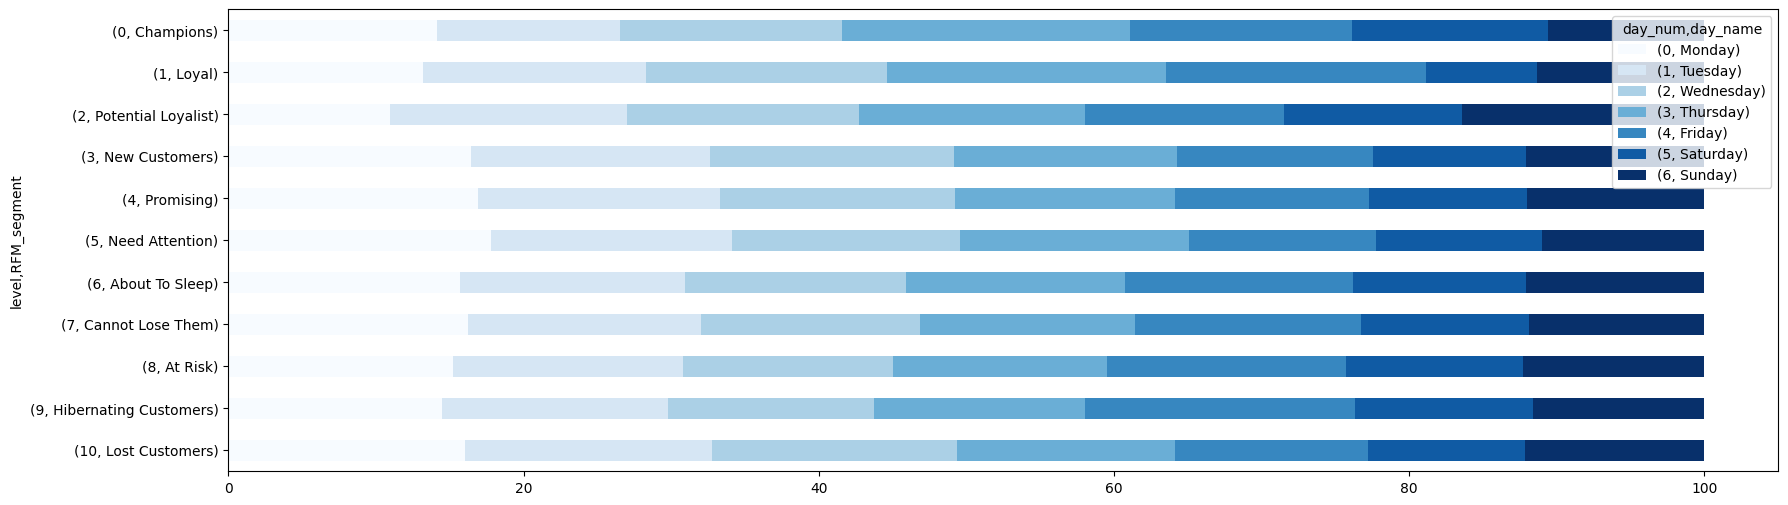

In [104]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 6))
 
# drawing the plot
daypiv.plot(kind='barh',stacked=True, colormap='Blues',rot=90, ax=ax)

ax.tick_params(axis='y', rotation=0)
plt.show()

**Produk**

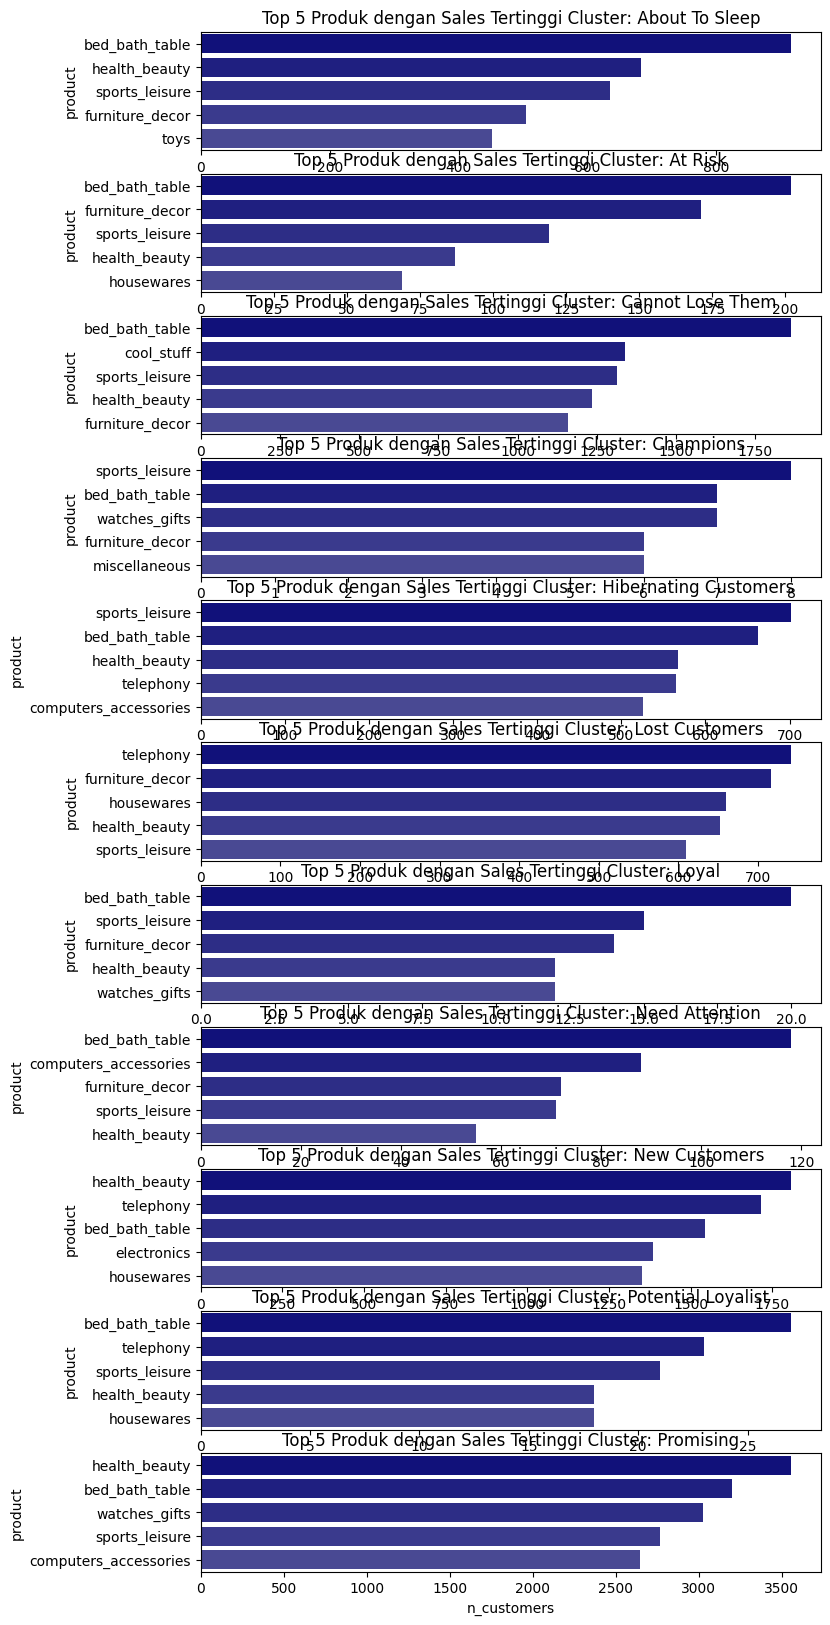

In [109]:
prod = data_segm.groupby(['RFM_segment','product_category_name_english'])['customer_unique_id'].nunique().reset_index().rename(columns={'customer_unique_id': 'n_customers','product_category_name_english':'product'})

segm = prod.RFM_segment.unique()

# Viz
c1 = sns.blend_palette(['darkblue', 'lightgrey'], 15)
fig, axes = plt.subplots(len(segm),1, figsize=(8, 20))
for i, val in enumerate(segm):
    sns.barplot(data=prod.query(f"RFM_segment == '{val}'").nlargest(5, columns='n_customers'), x = 'n_customers', y='product', palette=c1, ax=axes[i])
    axes[i].title.set_text(f'Top 5 Produk dengan Sales Tertinggi Cluster: {val}')

# plt.show()